In [6]:
import os
from os.path import join
import random
import numpy as np
from rich import print, inspect
from rich.progress import track
import torch
import random
import logging
# logging.basicConfig(level=logging.INFO)
# logging.getLogger('hyperopt').setLevel(logging.WARNING)
from colorlog import ColoredFormatter
import time
from typing import List, Dict, Any
from pdb import set_trace as bp
import sys
sys.path.append("./TopoTrojDetection/")
import xgboost as xgb
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
import multiprocessing
import ripser
import persim
from sklearn.metrics.pairwise import pairwise_distances
from scipy import sparse

from topological_feature_extractor import getGreedyPerm, getApproxSparseDM


from competition_model_data import ModelBasePaths, ModelData
from classifier_bin import xgb_classifier
from competition_classifier import load_all_models, featurize

def local_featurize(models: List[ModelData]):

    CLASSES = 5 # FIXME don't hardcode this
    n_classes = CLASSES
    fv_list = [x.fv for x in models]
    gt_list = [x.label for x in models]

    psf_feature=torch.cat([fv_list[i]['psf_feature_pos'].unsqueeze(0) for i in range(len(fv_list))])
    topo_feature = torch.cat([fv_list[i]['topo_feature_pos'].unsqueeze(0) for i in range(len(fv_list))])

    topo_feature[np.where(topo_feature==np.Inf)]=1
    n, _, nEx, fnW, fnH, nStim, C = psf_feature.shape
    psf_feature_dat=psf_feature.reshape(n, 2, -1, nStim, C)
    psf_diff_max=(psf_feature_dat.max(dim=3)[0]-psf_feature_dat.min(dim=3)[0]).max(2)[0].view(len(gt_list), -1)
    psf_med_max=psf_feature_dat.median(dim=3)[0].max(2)[0].view(len(gt_list), -1)
    psf_std_max=psf_feature_dat.std(dim=3).max(2)[0].view(len(gt_list), -1)
    psf_topk_max=psf_feature_dat.topk(k=min(3, n_classes), dim=3)[0].mean(2).max(2)[0].view(len(gt_list), -1)
    psf_feature_dat=torch.cat([psf_diff_max, psf_med_max, psf_std_max, psf_topk_max], dim=1)

    # dat=torch.cat([psf_feature_dat, topo_feature.view(topo_feature.shape[0], -1)], dim=1)

    # dat=psf_feature_dat

    dat = topo_feature.view(topo_feature.shape[0], -1)

    dat=preprocessing.scale(dat)
    gt_list=torch.tensor(gt_list)

    return {
        "features": np.array(dat),
        "labels": np.array(gt_list)
    }


device = torch.device('mps')

# TODO update this to ur device
# root = "/Users/huxley/dataset_storage/snn_tda_mats/LENET_MODELS/competition_dataset"
root = "/home/jerryhan/Documents/data"
models_dir = join(root, "all_models")
cache_dir = join(root, "calculated_features_cache")

models = load_all_models(models_dir, cache_dir)

# filter for only resnets
models = [x for x in models if x.architecture == "resnet50"]
# models = [x for x in models if x.architecture != "resnet50"]

triggered = [x for x in models if x.label == 1]
clean = [x for x in models if x.label == 0]

print(len(triggered), len(clean))
min_len = min(len(triggered), len(clean))
triggered = triggered[:min_len]
clean = clean[:min_len]
models = triggered + clean
np.random.shuffle(models)
print(len(models), "\n\n\n")

ft = local_featurize(models)


# get all the clean models from the output of local_featurize
clean_fts = np.array([ft["features"][i] for i in range(len(models)) if ft["labels"][i] == 0])
dirty_fts = np.array([ft["features"][i] for i in range(len(models)) if ft["labels"][i] == 1])

Output()

  INFO     | loaded 622 models in 0.78 seconds
  INFO     | loaded 622 models in 0.78 seconds
INFO:pythonConfig:loaded 622 models in 0.78 seconds


234 128

256

In [2]:
print(models[1])

Name: id-00000035
        Architecture: resnet50
        Label: 1
        loaded: ['fv']

In [6]:
res = [m.load_PH() for m in models[:10]]

starting load_PH 1

980

100%|███████████████████████████████████████████████████████████████████████████████████| 980/980 [00:00<00:00, 5043457.57it/s]


starting load_PH 1

980

100%|███████████████████████████████████████████████████████████████████████████████████| 980/980 [00:00<00:00, 6107604.64it/s]


starting load_PH 1

980

100%|███████████████████████████████████████████████████████████████████████████████████| 980/980 [00:00<00:00, 5897299.74it/s]


starting load_PH 1

980

100%|███████████████████████████████████████████████████████████████████████████████████| 980/980 [00:00<00:00, 6218483.99it/s]


starting load_PH 1

980

100%|███████████████████████████████████████████████████████████████████████████████████| 980/980 [00:00<00:00, 6382636.52it/s]


starting load_PH 1

980

100%|███████████████████████████████████████████████████████████████████████████████████| 980/980 [00:00<00:00, 6062563.30it/s]


starting load_PH 1

980

100%|███████████████████████████████████████████████████████████████████████████████████| 980/980 [00:00<00:00, 6452775.38it/s]


starting load_PH 1

980

100%|███████████████████████████████████████████████████████████████████████████████████| 980/980 [00:00<00:00, 6412508.46it/s]


starting load_PH 1

980

100%|███████████████████████████████████████████████████████████████████████████████████| 980/980 [00:00<00:00, 6452775.38it/s]


starting load_PH 1

980

100%|███████████████████████████████████████████████████████████████████████████████████| 980/980 [00:00<00:00, 4746441.02it/s]


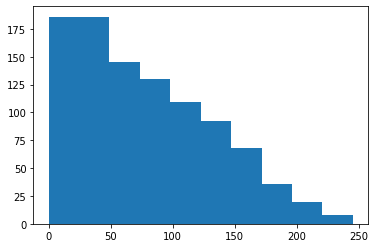

Name: id-00000842
        Architecture: resnet50
        Label: 0
        loaded: ['fv', 'PH_list']

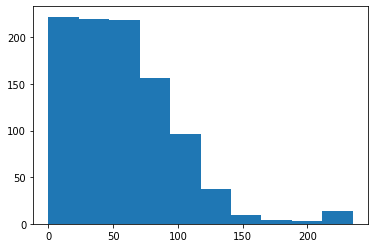

Name: id-00000035
        Architecture: resnet50
        Label: 1
        loaded: ['fv', 'PH_list']

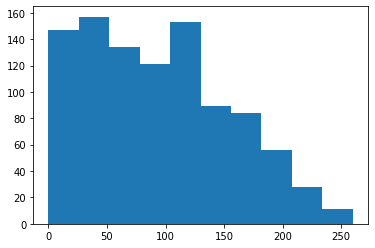

Name: id-00000395
        Architecture: resnet50
        Label: 1
        loaded: ['fv', 'PH_list']

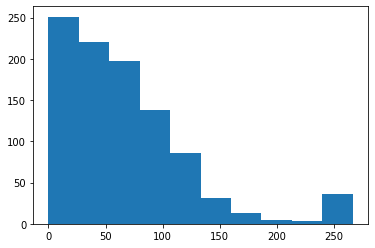

Name: id-00000683
        Architecture: resnet50
        Label: 0
        loaded: ['fv', 'PH_list']

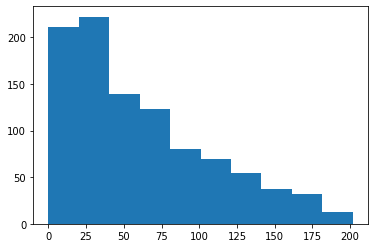

Name: id-00000540
        Architecture: resnet50
        Label: 1
        loaded: ['fv', 'PH_list']

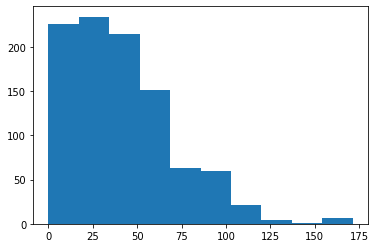

Name: id-00000539
        Architecture: resnet50
        Label: 0
        loaded: ['fv', 'PH_list']

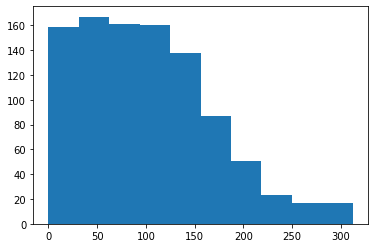

Name: id-00000892
        Architecture: resnet50
        Label: 0
        loaded: ['fv', 'PH_list']

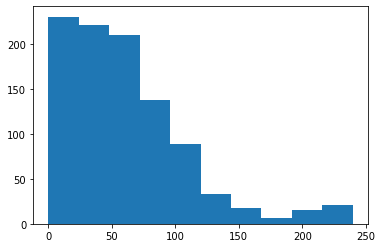

Name: id-00000375
        Architecture: resnet50
        Label: 0
        loaded: ['fv', 'PH_list']

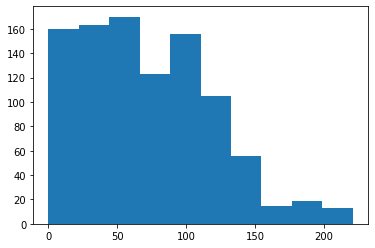

Name: id-00000054
        Architecture: resnet50
        Label: 1
        loaded: ['fv', 'PH_list']

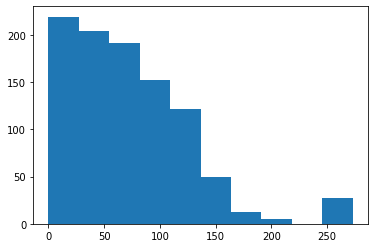

Name: id-00000151
        Architecture: resnet50
        Label: 1
        loaded: ['fv', 'PH_list']

In [27]:
for idx in range(10):
    plt.hist(res[idx])
    plt.show()
    print(models[idx])

In [ ]:
d = [_[1] for _ in d0]
plt.hist(d)

(array([  1., 901.,  77.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.11338903, 0.22677806, 0.3401671 , 0.45355613,
        0.56694516, 0.68033419, 0.79372322, 0.90711225, 1.02050129,
        1.13389032]),
 <BarContainer object of 10 artists>)

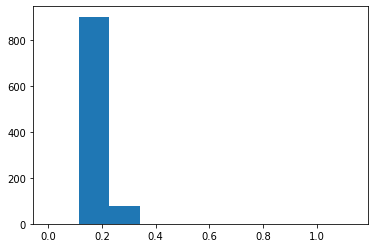

In [7]:
d = [_[1] for _ in d1]
plt.hist(d)

In [8]:
np.argmax(d)

720

In [9]:
len(d)

980

In [24]:
def plot_persistence_diagram():

    def makeSparseDM(X, thresh):
        N = X.shape[0]
        D = pairwise_distances(X, metric='euclidean')
        [I, J] = np.meshgrid(np.arange(N), np.arange(N))
        I = I[D <= thresh]
        J = J[D <= thresh]
        V = D[D <= thresh]
        return sparse.coo_matrix((V, (I, J)), shape=(N, N)).tocsr()
    
    rips = ripser.Rips()

    # clean_PH_lists = [x.PH_list for x in clean]
    # dirty_PH_lists = [x.PH_list for x in triggered]

    # acc_clean = [ [], [] ]

    # # ph list is of the form: [H0, H1]
    # # take all the clean PH lists, and join them into a single list
    # for model in clean_PH_lists:
    #     # acc_clean[0] = np.array([*acc_clean[0], *model[0]])
    #     # acc_clean[1] = np.array([*acc_clean[1], *model[1]])
    #     print(model[0])

    # create a matrix D as the sum of all the correlation matrices for the clean models

    a = clean[0].fv["correlation_matrix"]
    a[np.isnan(a)] = 0

    b = clean[1].fv["correlation_matrix"]
    b[np.isnan(b)] = 0

    c = triggered[0].fv["correlation_matrix"]
    c[np.isnan(c)] = 0

    # plt.figure(figsize = (10, 10))
    # plt.matshow(a)
    # plt.imshow(c, cmap='coolwarm', interpolation='none')
    # plt.colorbar()

    # plt.show()

    # return
    # D = triggered[0].fv["correlation_matrix"]
    D = clean[1].fv["correlation_matrix"]
    
    #for i in range(1, len(triggered)):
    #    D += triggered[i].fv["correlation_matrix"]
    #D /= len(triggered)

    # replace all instances of Nan with 0
    D[np.isnan(D)] = 0
    D[np.isinf(D)] = 1

    D = makeSparseDM(D, 20)
    # plt.matshow(D)
    # plt.show()
    # print(D)

    # lambdas=getGreedyPerm(D)
    # print("lambdas", lambdas)
    # D = getApproxSparseDM(lambdas, 2, D)
    # print(D)
    PH=rips.fit_transform(D, distance_matrix=True)
    

    plt.figure(figsize = (7, 7))
    rips.plot(PH)
    plt.show()



# plot_persistence_diagram()

def histogram_params():
    PARAM = 3
    for i in range(len(clean_fts[0])):

        a = sorted(clean_fts[:, i])[:-2]
        b = sorted(dirty_fts[:, i])[:-2]
        bins=np.histogram(np.hstack((a,b)), bins=40)[1] #get the bin edges


        plt.hist(a, bins = bins, alpha=0.5, label='clean', color='green')
# plt.hist(clean_fts[:, PARAM],  alpha=0.5, label='clean', color='green')
        plt.hist(b, bins = bins, alpha=0.5, label='dirty', color='red')
        plt.legend(loc='upper right')
        plt.show()


# histogram_params()

In [40]:
clean_fts.shape

(128, 11760)

In [143]:
x1 = clean_fts[1][11::12]
x2 = dirty_fts[1][11::12]

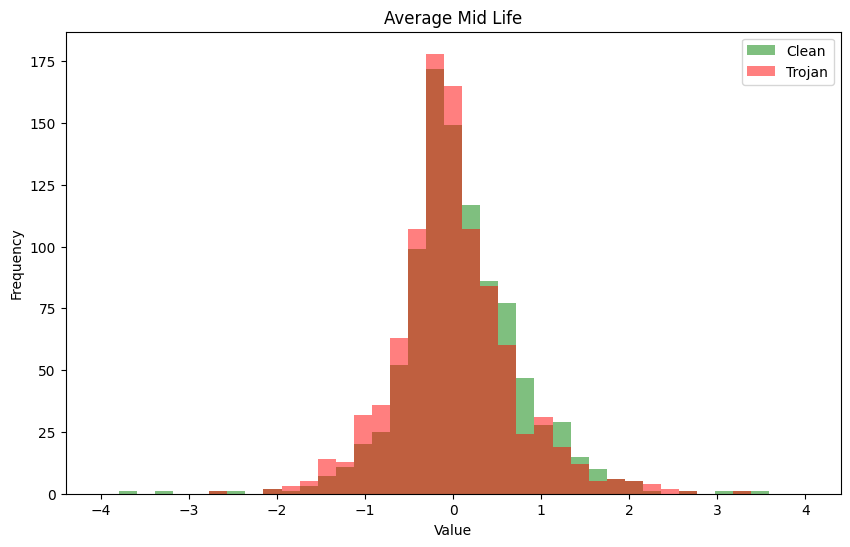

In [145]:
plt.figure(figsize=(10, 6))

#bins = np.linspace(min(min(x1), min(x2)), max(max(x1), max(x2)), 40)
bins = np.linspace(-4, 4, 40) 
# bins = 40

plt.hist(x1, bins=bins, alpha=0.5, label='Clean', color='green')
plt.hist(x2, bins=bins, alpha=0.5, label='Trojan', color='red')

plt.legend(loc='upper right')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Average Mid Life')

plt.show()

In [239]:

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

'''
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(60, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.dropout = nn.Dropout(p=0.5)
        self.fc1 = nn.Linear(64 * 14 * 14, 128)  # Adjusted for the removal of the max pooling layers
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        # x = self.dropout(x)
        x = F.relu(self.conv2(x))
        x = x.view(-1, 64 * 14 * 14)  # Adjusted for the removal of the max pooling layers
        x = F.relu(self.fc1(self.dropout(x)))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc2(x))
        return x
'''

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(60, 64, kernel_size=3, stride=1, padding=1)
        self.dropout1 = nn.Dropout(p=0.2)  # Increased dropout rate
        self.conv2 = nn.Conv2d(64, 32, kernel_size=3, stride=1, padding=1)
        self.dropout2 = nn.Dropout(p=0.2)  # Increased dropout rate
        self.conv3 = nn.Conv2d(32, 128, kernel_size=3, stride=1, padding=1)  # Additional convolutional layer
        self.dropout3 = nn.Dropout(p=0.2)  # Increased dropout rate
        self.fc1 = nn.Linear(128 * 14 * 14, 256)  # Increased size and adjusted for the additional convolutional layer
        self.dropout4 = nn.Dropout(p=0.2)  # Increased dropout rate
        self.fc2 = nn.Linear(256, 128)  # Additional fully connected layer
        self.dropout5 = nn.Dropout(p=0.2)  # Increased dropout rate
        self.fc3 = nn.Linear(128, 1)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.dropout1(x)
        x = F.relu(self.conv2(x))
        x = self.dropout2(x)
        x = F.relu(self.conv3(x))
        x = self.dropout3(x)
        x = x.view(-1, 128 * 14 * 14)
        x = F.relu(self.fc1(self.dropout4(x)))
        x = F.relu(self.fc2(self.dropout5(x)))
        x = torch.sigmoid(self.fc3(x))
        return x
        
    
class cnn_classifier:
    def __init__(self, features: Dict,
                 labels: Dict,
                 classifier_params = None,
                 general_params = None
                 ):
        """ this needs to be able to load the data, run the classifier
            and have a method for running tests
        """

        self.features = features
        self.labels = labels

        print(self.features['train'].shape)

        self.classifier_params = classifier_params
        self.general_params = general_params

        if self.classifier_params is None or self.general_params is None:
            self.get_default_params()

        self.model = Net()

    def get_default_params(self):
        pass

    def train(self):
        criterion = nn.BCELoss()
        optimizer = optim.SGD(self.model.parameters(), lr=0.001, momentum=0.9)

        for epoch in range(12):  # loop over the dataset multiple times
            running_loss = 0.0
            for i, data in enumerate(self.features['train'], 0):
                # get the inputs; data is a list of [inputs, labels]
                inputs = data
                labels = (self.labels['train'][i]).reshape(1,1)
                

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward + backward + optimize
                # print(labels.shape)
                outputs = self.model(inputs)
                # print("OK")
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                # print statistics
                running_loss += loss.item()
                if i % 100 == 99:    # print every 2000 mini-batches
                    print('[%d, %5d] loss: %.3f' %
                          (epoch + 1, i + 1, running_loss / 2000))
                    running_loss = 0.0

        print('Finished Training')

    def eval_on_train(self):
        correct = 0
        total = 0
        with torch.no_grad():
            for i, data in enumerate(self.features['train'], 0):
                images, labels = data, self.labels['train'][i]
                outputs = self.model(images)
                # print(outputs)
                predicted = (outputs.data > 0.5)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        print('Accuracy of the network on the train images: %d %%' % (
            100 * correct / total))
        
    def test(self):
        correct = 0
        total = 0
        with torch.no_grad():
            for i, data in enumerate(self.features['test'], 0):
                images, labels = data, self.labels['test'][i]
                outputs = self.model(images)
                # print(outputs)
                predicted = (outputs.data > 0.5)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        print('Accuracy of the network on the test images: %d %%' % (
            100 * correct / total))


In [240]:
dat = ft['features']
dat = dat.reshape(256, 60, 14, 14) 
print(dat.shape)

dat = torch.from_numpy(dat).float()

gt_list = ft['labels']
gt_list = torch.tensor(gt_list, dtype=torch.float32).reshape(-1, 1)

N = len(gt_list)
n_train = int(TRAIN_TEST_SPLIT * N)
ind_reshuffle = np.random.choice(list(range(N)), N, replace=False)
train_ind = ind_reshuffle[:n_train]
test_ind = ind_reshuffle[n_train:]

feature_train, feature_test = dat[train_ind], dat[test_ind]
gt_train, gt_test = gt_list[train_ind], gt_list[test_ind]

(256, 60, 14, 14)

In [241]:
X = cnn_classifier(
    features = {
        'train': feature_train, 'test': feature_test
    },
    labels = {
        'train': gt_train, 'test':gt_test
    }
)

torch.Size([204, 60, 14, 14])

In [242]:
X.train()

[1,   100] loss: 0.035

[1,   200] loss: 0.035

[2,   100] loss: 0.034

[2,   200] loss: 0.034

[3,   100] loss: 0.032

[3,   200] loss: 0.033

[4,   100] loss: 0.029

[4,   200] loss: 0.029

[5,   100] loss: 0.025

[5,   200] loss: 0.027

[6,   100] loss: 0.021

[6,   200] loss: 0.021

[7,   100] loss: 0.015

[7,   200] loss: 0.009

[8,   100] loss: 0.007

[8,   200] loss: 0.008

[9,   100] loss: 0.006

[9,   200] loss: 0.006

[10,   100] loss: 0.003

[10,   200] loss: 0.004

[11,   100] loss: 0.012

[11,   200] loss: 0.003

[12,   100] loss: 0.002

[12,   200] loss: 0.001

Finished Training

In [245]:
X.test()

Accuracy of the network on the test images: 63 %

In [246]:
X.eval_on_train()

Accuracy of the network on the train images: 100 %